# Introduction

In workshop 6, we learned linear regression and logistic regression. We talked about what kind of data works for which model, what's the purpose of each model, their assumptions on data, advantages and disadvantages. Along with introduction of models we also briefly introduced the loss functions for these models and how they work to give the best combination of parameters.

However, regressions are not always good choices to use in machine learning. They rely on data preprocessing to have better accuracy and there are not many scenarios that they can be applied. In this workshop we are introducing two most popular machine learning algorithms: decision tree and random forest. They are simple but intelligent, much more powerful than regressions.

**_Decision tree_** is like playing a game of "20 Questions" - it asks a series of yes/no questions to reach a conclusion. For example, to decide if someone will like a movie, it might ask: "Is it an action movie? → Is it rated PG-13? → Does it have good reviews?" Following these questions leads to a prediction.

Example of a simple decision tree:
<img src="img/Simple_Decision_Tree_diagram.png" alt="Simple Decision Tree" align = "left" width = 1200px>

**_Random forest_** is like asking 100 different friends for their opinion about the same thing, where each friend asks slightly different questions, and then going with what most of them say. This group approach usually gives better answers than asking just one person (or using just one decision tree).

Decision trees and random forests have transformed machine learning by offering a balance of power and practicality. Decision trees made machine learning more accessible and interpretable - even non-experts can understand how they make decisions, making them valuable in fields like medical diagnosis and credit scoring where transparency is crucial. Random forests then solved the main weakness of decision trees (their tendency to overfit) while maintaining most of their interpretability, becoming one of the most reliable and widely-used algorithms in data science. Together, they've shown that machine learning doesn't always need to be a complex "black box" to be effective.

# Decision Tree Learning

Decision tree learning is a supervised learning approach used in statistics, data mining and machine learning. In this formalism, a classification or regression decision tree is used as a predictive model to draw conclusions about a set of observations.

Features can be classified as categorical features or numerical features. Categorical features can take on one of a limited number of possible values, while numerical features can take any integers or real numbers (sometimes are restricted to a range).

Categorical features are always discrete. Numerical features can be either continuous or discrete, depending on their data types.

There are three well-known decision tree algorithms: ID3, C4.5 and CART.

## 1. Information theory

Constructing a decision tree is dividing dataset at each node. A good decision tree is a tree that there are strong distinctions between subsets assigned to children nodes.

**_Entropy_** $ {\rm H}(T) $ describes the uncertainty of a target random discrete variable $ T \in {\cal T} $.

$$
    {\rm H}(T) = - \sum_{t \in {\cal T}} \Pr(T = t) \log_2 \Pr(T = t) \tag{1}
$$

where $ \Pr $ stands for **_probability mass function_** and $ \Pr(T = t) $ is the probability that $ T $ is exactly equal to $ t $.

**_Information gain_** $ IG(T, A) $ is the entropy difference between a parent node and sum of its children nodes wrt. attribute $ A \in {\cal A} $, means how much information is gained when data is split by attribute $ A $.

$$
    \overbrace{IG(T, A)}^{\text{IG when split by attribute }A} =
        \overbrace{{\rm H}(T)}^\text{entropy of parent node} - \overbrace{{\rm H}(T | A)}^\text{weighted sum of entropies of children nodes}
$$

$$
    IG(T, A) = - \sum_{t \in {\cal T}} \Pr(T = t) \log_2 \Pr(T = t) -
        \sum_{a \in {\cal A}} Pr(A = a) \sum_{t \in {\cal T}} - \Pr(T = t | A = a) \log_2 \Pr(T = t | A = a) \tag{2}
$$

where $ \Pr(T = t | A = a) $ is the conditional probability that the variable $ T $ is exactly equal to $ t $ given that variable $ A $ is exactly equal to $ a $.

The conditional entropy $ {\rm H}(T|A) $ looks crazy. It is the weighted sum of entropies of children nodes, so we need a summation over all possible values of attribute $ A $ because we split data by it. $ \Pr(A = a) $ makes the entropy weighted and the remaining part is basically the entropy when stand at views of children nodes, because these nodes are processing data already split by parent node so the probability distribution of target $ T $ changes.

For example, the table below describes the appearance of some candies (tasteless candies are indicated in the table, others are tasty):

| Size\Colour | Red | Green | TOTAL |
| --- | :---: | :---: | :---: |
| Small | 5 | 10 (5 tasteless) | 15 (5 tasteless) |
| Normal | 15 | 20 (8 tasteless) | 35 (8 tasteless) |
| TOTAL | 20 | 30 (13 tasteless) | 50 (13 tasteless) |

Assume that we are classifying candies by their tastiness, then the entropy of root node is

$$
    {\rm H}(\text{Tastiness}) = - (\frac{13}{50} \log_2 \frac{13}{50} + \frac{37}{50} \log_2 \frac{37}{50}) = 0.827
$$

Conditional entropies of children nodes:

$$
    {\rm H}(\text{Tastiness} | \text{Colour}) =
        \overbrace{-\frac{20}{50} (\underbrace{\frac{20}{20} \log_2 \frac{20}{20}}_\text{tasty} + \underbrace{\frac{0}{20} \log_2 \frac{0}{20}}_\text{tasteless})}^\text{red} +
        \overbrace{-\frac{30}{50} (\underbrace{\frac{17}{30} \log_2 \frac{17}{30}}_\text{tasty} + \underbrace{\frac{13}{30} \log_2 \frac{13}{30}}_\text{tasteless})}^\text{green}
    = 0.592
$$

$$
    {\rm H}(\text{Tastiness} | \text{Size}) =
        \overbrace{-\frac{15}{50} (\underbrace{\frac{10}{15} \log_2 \frac{10}{15}}_\text{tasty} + \underbrace{\frac{5}{15} \log_2 \frac{5}{15}}_\text{tasteless})}^\text{small} +
        \overbrace{-\frac{35}{50} (\underbrace{\frac{27}{35} \log_2 \frac{27}{35}}_\text{tasty} + \underbrace{\frac{8}{35} \log_2 \frac{8}{35}}_\text{tasteless})}^\text{normal}
    = 0.818
$$

And information gains when splitted by either colour or size:

$$
    \begin{align*}
        IG(\text{Tastiness}, \text{Colour}) &= {\rm H}(\text{Tastiness}) - {\rm H}(\text{Tastiness}|\text{Colour})
            = 0.827 - 0.592 = 0.235 \\
        IG(\text{Tastiness}, \text{Size}) &= {\rm H}(\text{Tastiness}) - {\rm H}(\text{Tastiness}|\text{Size})
            = 0.827 - 0.818 = 0.009 \\
    \end{align*}
$$

$ 0.235 > 0.009 $, which means splitting by the colour attribute brings more information about the data, because from the dataset we know all the tasteless candies are green, then splitting by colour removes the uncertainty on the red candies (they are all tasty). But splitting by size you are still uncertain about the tastiness of two sets of candies.

**_Gini impurity_** $ {\rm I}_G(p)$ measures how often a randomly chosen element of a set would be incorrectly labeled if it were labeled randomly and independently according to the distribution of labels in the set. It reaches its minimum (zero) when all cases in the node fall into a single target category.

For a set of items with $ M $ classes and relative frequencies $ p_i, i \in { 1, 2, \ldots, M } $, the probability of choosing an item with label $ i $ is $ p_i $ and the probability of miscategorizing that item is $ 1 - p_i $. The Gini impurity is computed by summing pairwise products of these probabilities for each class lable:

$$
    {\rm I}_G(p) = \sum_{i=1}^M p_i(1 - p_i) = \sum_{i=1}^M (p_i - p_i^2) = \sum_{i=1}^M p_i - \sum_{i=1}^M p_i^2
        = 1 - \sum_{i=1}^M p_i^2
$$

## 2. Iterative Dichotomiser 3 (ID3)

The ID3 algorithm begins with the original set $ S $ as the root node. On each iteration of the algorithm, it iterates through every unused attribute of the set $ S $ and calculates the entropy $ {\rm H}(S) $ or the information gain $ IG(S) $ of that attribute. It then selects the attribute which has the smallest entropy (or largest information gain) value. The set $ S $ is then split or partitioned by the selected attribute to produce subsets of the data.

Recursion on a subset may stop in one of these cases:

- every element in the subset belongs to the same class; in which case the node is turned into a leaf node and labelled with the class of the examples.
- there are no more attributes to be selected, but the examples still do not belong to the same class. In this case, the node is made a leaf node and labelled with the most common class of the examples in the subset.
- there are no examples in the subset, which happens when no example in the parent set was found to match a specific value of the selected attribute. An example could be the absence of a person among the population with age over 100 years. Then a leaf node is created and labelled with the most common class of the examples in the parent node's set.

Throughout the algorithm, the decision tree is constructed with each non-terminal node (internal node) representing the selected attribute on which the data was split, and terminal nodes (leaf nodes) representing the class label of the final subset of this branch.

## 3. C4.5

C4.5 builds decision trees from a set of training data in the same way as ID3, using the concept of information entropy. The training data is a set $ S = s_1, s_2, \ldots $ of already classified samples. Each sample $ s_i $ consists of a $ k $-dimensional vector $ \begin{bmatrix} x_{1i} & x_{2i} & \cdots & x_{ki} \end{bmatrix} $, where the $ x_j $ represent attribute values or features of the sample, as well as the class in which $ s_i $ falls.

At each node of the tree, C4.5 chooses the attribute of the data that most effectively splits its set of samples into subsets enriched in one class or the other. The splitting criterion is the normalized information gain (difference in entropy). The attribute with the highest normalized information gain is chosen to make the decision. The C4.5 algorithm then recurses on the partitioned sublists.

This algorithm has a few base cases.

- All the samples in the list belong to the same class. When this happens, it simply creates a leaf node for the decision tree saying to choose that class.
- None of the features provide any information gain. In this case, C4.5 creates a decision node higher up the tree using the expected value of the class.
- Instance of previously unseen class encountered. Again, C4.5 creates a decision node higher up the tree using the expected value.

In pseudocode, the general algorithm for building decision trees is:

1. Check for the above base cases.
2. For each attribute $ a $, find the normalized information gain ratio from splitting on $ a $.
3. Let $ a\_best $ be the attribute with the highest normalized information gain.
4. Create a decision node that splits on $ a\_best $.
5. Recurse on the sublists obtained by splitting on $ a\_best $, and add those nodes as children of node.

ID3: information gain
C4.5: 
CART: gini impurity/cross entropy
with formula

## 4. Classification and Regression Trees (CART)

CART is an umbrella term consisting of classification tree algorithm and regressor tree algorithm.

Unlike ID3 and C4.5 which can create multi-way splits for categorical features, CART always creates binary splits. For categorical task with $ M $ classes, CART considers all $ 2^{M-1}-1 $ possible binary groupings. For continuous variables, it sorts values and consider all possible threshold splits.

For classification task, CART uses Gini impurity instead of information gain since Gini impurity is less computationally intensive than entropy. For regression task, the usual choice is mean squared error (see workshop 6).

When this algorithm reaches some termination criteria, we come up with a maximum tree, which typically overfits with the training data. Pruning is used to remove sections of the tree that are non-critical and redundant to classify instances and hence improves predictive accuracy.

**_Reduced error pruning_** is one of the simplest forms of pruning. Starting at the leaves, each node is replaced with its most popular class. If the prediction accuracy is not affected then the change is kept. While somewhat naive, reduced error pruning has the advantage of simplicity and speed.

**_Cost complexity pruning_** generates a series of trees ⁠$ T_0, \ldots, T_m $⁠ where ⁠$ T_0 $ is the initial tree and ⁠$ T_n $⁠ is the root alone. At step ⁠$ i = 1, \ldots, n $⁠, the tree is created by removing a subtree $ t $ from tree ⁠$ T_{i-1} $⁠ and replacing it with a leaf node with value chosen as in the tree building algorithm. The subtree $ t $ that is removed is chosen with minimum relative accuracy loss, as follows:

$$
    \underset{t}{\rm argmin} \left( \frac{{\rm accuracy}(T, S) - {\rm accuracy}(T - t, S)}{|T| - |T - t|} \right)
$$

where $ {\rm argmin} $ returns a subtree $ t $ where the expression minimized, $ {\rm accuracy}(T, S) $ evaluates to accuracy of tree $ T $ on dataset $ S $, $ T - t $ means the remaining tree when subtree $ t $ is removed from $ T $ and $ |T| $ is the number of leaves in tree $ T $.

Once the series of trees ⁠$ T_0, \ldots, T_m $ has been created, the best tree is chosen by generalized accuracy as measured by a training set or cross-validation.

## 5. The Forest CoverType dataset

This dataset contains both categorical and numerical data, is a classification task.

Number of instances: 581,012

Number of attributes: 12 (dimensionality: 54)

Target: Cover_Type (integer)

Feature Table:
| Index | Name | Type |
| ---: | --- | --- |
| 0 | Elevation | Integer |
| 1 | Aspect | Integer |
| 2 | Slope | Integer |
| 3 | Horizontal_Distance_To_Hydrology | Integer |
| 4 | Vertical_Distance_To_Hydrology | Integer |
| 5 | Horizontal_Distance_To_Roadways | Integer |
| 6 | Hillshade_9am | Integer |
| 7 | Hillshade_Noon | Integer |
| 8 | Hillshade_3pm | Integer |
| 9 | Horizontal_Distance_To_Fire_Points | Integer |
| 10-13 | Wilderness_Area | Categorical (one-hot) |
| 14-53 | Soil_Type | Categorical (one-hot) |

**_One-hot_** is a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0).

Use [`sklearn.datasets.fetch_covtype`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html) to load the covertype dataset.

In [4]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline

# load covertype dataset
X, y = sklearn.datasets.fetch_covtype(as_frame=True, return_X_y=True)

# split the dataset into 80% train set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"{X.shape = }")
print(f"example of Wilderness_Area: {np.asarray(X)[0][10:14]}")
print(f"example of Soil_Type: {np.asarray(X)[0][14:]}")

X.shape = (581012, 54)
example of Wilderness_Area: [1. 0. 0. 0.]
example of Soil_Type: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 6. Workshop 6 review task

_If you didn't come to workshop 6 or you don't know linear regression, you can skip this exercise._

Use logistic regression to do the classification task, train you model with train set, and then test accuracy on the test set.

You might get convergence warning with the default number of iterations (100). There is no need to try with a higher setting since it takes significant time to train the model but the model parameters may still cannot reaches convergence and does not provide higher accuracy. This is the limitation of logistic model.

_Think: how would you preprocess the data?_

In [16]:
# step 1: INITIALISE and FIT logistic regression model without preprocessing
# model = 

print(f"no preprocessing: {model.score(X_test, y_test)}")

# step 2: initialise a pipeline with normalisation and logistic regression
# TODO: write your code here
# hint: pipe = 

# step 3: fit the pipline
# TODO: write your code here

print(f"with normalisation: {pipe.score(X_test, y_test)}")

## 7. CART for classification

Use classification tree to do the covertype task.

Use [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to build a classification tree. The following is the signature of the class:

```python
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
```

The star symbol (`*`) as the first argument indicates that all the arguments followed can only be set by keyword arguments (e.g. call `sklearn.tree.DecisionTreeClassifier(max_depth=10)` instead of `sklearn.tree.DecisionTreeClassifier(10)`).

The `criterion` argument sets the loss function to use, the default is gini impurity, available choices are `'gini'`, `'entropy'` and `'log_loss'`.

The `max_depth` argument sets the maximum depth of tree, which helps to avoid overfitting on training set. The default is `None` which does not restrict tree depth.

In [ ]:
# step1: initialize decision tree classifier
# TODO: write your code here
# model = 

# step2: fit decision tree classifier
# TODO: write your code here

# step3: evaluate the decision tree model
# model.score(X_test, y_test) # uncomment this line to evaluate the model

_Think: compared to logistic regression, which has a higher accuracy in this prediction task? What causes the differences?_

## 8. CART for regression

Use [`sklearn.tree.DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) to build a regression tree.

The fitting result of a regression tree is completely different from that of linear regression. In linear regression we assume there exists a linear relationship between features and target, so the model is actually a smooth best-fit curve. While in regression tree, the domain of each feature is splitted and each part is mapped with a target value.

The following code piece shows the difference between linear regression and regression tree.

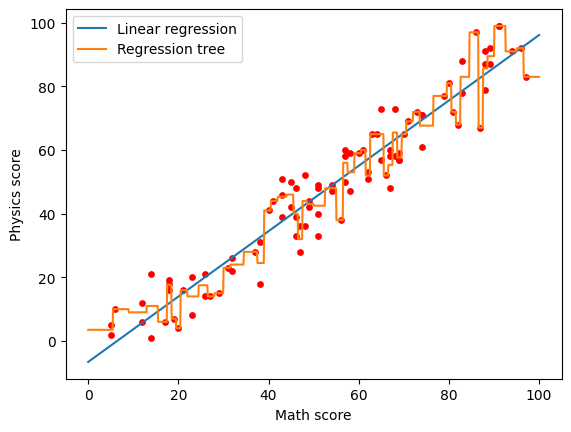

In [16]:
# use Workshop6/data/simple_linear.csv

dataset = pd.read_csv("../Workshop6/data/simple_linear.csv").to_numpy()
X, y = np.split(dataset, [1], axis=1)

model1 = sklearn.linear_model.LinearRegression().fit(X, y)
model2 = sklearn.tree.DecisionTreeRegressor().fit(X, y)

plt.ylabel("Physics score")
plt.xlabel("Math score")
plt.scatter(X, y, s=15, c="r")
plt.plot([0, 100], model1.predict([[0], [100]]), label="Linear regression")
x_samples = np.linspace(0, 100, 1000)
plt.plot(x_samples, model2.predict([[x] for x in x_samples]), label="Regression tree")
plt.legend()
plt.show()

# Model Selection

In workshop 6, we have learnt the concepts of **_underfitting_** and **_overfitting_**, and demonstrated how to choose the degree in polynomial regression by experimenting the performance of each choice.

Obviously, the regression tree example in previous section overfits since the line passes through many data points. This can be improved by reduce the maximum depth, which is a hyperparameter of regression tree.

A **_hyperparameter_** is an attribute of model that can be set in order to define any configurable part of a model's learning process. They must be set before training. Don't be confused with **_parameters_**, which are characteristics that the model learns from the data.

There are several ways to optimise hyperparameters of your models: grid search, random search, Bayesian optimisation, gradient-based optimisation, evolutionary optimisation, etc. The procedure used in workshop 6 is basically the idea of grid search.

**_Cross-validation_** is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. Cross-validation includes resampling and sample splitting methods that use different portions of the data to test and train a model on different iterations. It is often used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. It can also be used to assess the quality of a fitted model and the stability of its parameters.

One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the **_validation set_**). To reduce variability, in most methods multiple rounds of cross-validation are performed using different partitions, and the validation results are combined (e.g. averaged) over the rounds to give an estimate of the model's predictive performance.

Diagram of **_k-fold cross-validation_**: 

<img src="img/K-fold_cross_validation.png" alt="K-fold cross-validation" height=300px>

## 1. Grid search

Grid search is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a hold-out validation set.

Use [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) in scikit-learn to do a grid search. The first argument is the model your are using, and the second one is a dictionary of what hyperparameters you are testing mapped with their possible values. The `cv_results_` attribute is a dictionary of cross-validation results, and the `best_estimator_` attribute is the model instantiated with the best combination of hyperparameters.

In [12]:
# use data/polynomial.csv in workshop6

# step1: Load and prepare the data
# Split the dataset into features (X) and target values (y).
dataset = pd.read_csv("../Workshop6/data/polynomial.csv").to_numpy()
X, y = np.split(dataset, [1], axis=1)

# step2: Split the data into 80% train set and 20% test set
# TODO: write your code here

# step3: Define the pipeline and perform hyperparameter tuning
# Create a pipeline that includes polynomial feature transformation and a linear regression model.
# Use GridSearchCV to find the best degree for PolynomialFeatures.
# TODO: write your code here
# pipe = 
# grid = 

# step4: Fit the pipeline with training data
# TODO: write your code here

print(f"accuracy: {grid.score(X_test, y_test)}") # usually around 99%
print(f"best: {grid.best_estimator_}") # degree of PolynomialFeatuers is usually 2 or 3

## 2. Bayesian optimisation

Bayesian optimization is typically used on problems of the form $ \max_{x \in {\cal A}}f(x) $, where $ {\cal A} $ is a set of points, $ x $, which rely upon less than (or equal to) 20 dimensions ($ {\Bbb R}^d, d \le 20 $), and whose membership can easily be evaluated. Bayesian optimization is particularly advantageous for problems where f(x) is difficult to evaluate due to its computational cost. The objective function, $ f $, is continuous and takes the form of some unknown structure, referred to as a "black box". Upon its evaluation, only $ f(x) $ is observed and its derivatives are not evaluated.

Since the objective function is unknown, the Bayesian strategy is to treat it as a random function and place a prior over it. The prior captures beliefs about the behavior of the function. After gathering the function evaluations, which are treated as data, the prior is updated to form the posterior distribution over the objective function. The posterior distribution, in turn, is used to construct an acquisition function (often also referred to as infill sampling criteria) that determines the next query point.

# Random Forest

**_Random Forest_** is an ensemble learning method for classification, regression and other tasks that works by creating a multitude of decision trees during training. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the output is the average of the predictions of the trees. Random forests correct for decision trees' habit of overfitting to their training set.

**_Ensemble methods_** are methods that uses the idea of combining multiple learning algorithms together to make a more reliable prediction than using any of them in themselves.

## 1. Bootstrap aggregating

The training algorithm for random forests applies the general technique of **_bootstrap aggregating_**, or **_bagging_**, to tree learners. Given a training set, bagging repeatedly ($ B $ times) selects a random sample with replacement of the training set and fits trees to these samples.

After training, regression predictions for unseen samples $ x' $ can be made by averaging the predictions from all the individual regression trees on $ x' $:

$$
    \hat{f} = \frac 1B \sum_{b=1}^B f_b (x')
$$

where $ \hat{f} $ is the final prediction function, $ f_b $ is the prediction function of $ b $-th tree.

For classification tasks, prediction is made by taking the plurality vote.

This bootstrapping procedure leads to better model performance because it decreases the variance of the model, without increasing the bias. This means that while the predictions of a single tree are highly sensitive to noise in its training set, the average of many trees is not, as long as the trees are not correlated. Simply training many trees on a single training set would give strongly correlated trees (or even the same tree many times, if the training algorithm is deterministic); bootstrap sampling is a way of de-correlating the trees by showing them different training sets.

Use [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to do a classification task. The `n_estimators` argument specifies number of decision trees, defaults to 100. The `bootstrap` argument specifies whether bootstrap samples are used when building trees, defaults to `True`.

In [13]:
# step1: Load the Forest CoverType dataset
# Fetch the dataset and split it into features (X) and target (y).
# TODO: write your code here
# X, y =

# step2: Split the data into 80% train set and 20% test set
# TODO: write your code here

# step3: Train a RandomForestClassifier
# Instantiate the model and fit it with the training data.
# TODO: write your code here

# step4: evaluate the decision tree model (usually around 95%)
# TODO: write your code here

_Think: compared to a single decision tree, which has a higher accuracy in this prediction task? What do you think is the reason behind this? Would it always hold in all tasks and situations?_

# Optional Task
 
Use digits dataset ([`sklearn.datasets.load_digits`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)) to do a classification task and compare accuracies of decision trees by using preprocessed data and not-preprocessed data. Is the difference significant and why is that?

In [3]:
# step1: Load the Digits dataset
# TODO: write your code here
# X, y = 

# step2: Split the data into 80% train set and 20% test set
# TODO: write your code here

# Step3: Train and evaluate a DecisionTreeClassifier without preprocessing
# TODO: write your code here
# model1 = 

print(f"accuracy 1: {model1.score(X_test, y_test)}")

# Step4: Train and evaluate a DecisionTreeClassifier with StandardScaler preprocessing
# TODO: write your code here
# model2 = 

print(f"accuracy 2: {model2.score(X_test, y_test)}")